In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-full.csv',delimiter=";")

In [3]:
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
keep = ['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']

In [6]:
df = df[keep]

In [7]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_full_train, df_test = train_test_split(df, test_size=.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
df_train.shape, df_val.shape, df_test.shape

((27126, 15), (9042, 15), (9043, 15))

In [10]:
y_train = (df_train['y'] == 'yes').astype(int)
y_test = (df_test['y'] == 'yes').astype(int)
y_val = (df_val['y'] == 'yes').astype(int)

del df_train['y']
del df_test['y']
del df_val['y']

In [11]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [12]:
numerical = list(df_train.dtypes[df_train.dtypes=='int64'].index)

In [13]:
df[numerical]

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


#### Question 1 - ROC AUC feature importance

In [37]:
df_train[numerical]

,age,balance,day,duration,campaign,pdays,previous
0,56,40,11,123,2,-1,0
1,33,4790,20,137,1,272,2
2,32,392,21,148,2,-1,0
3,40,2129,30,452,1,-1,0
4,54,1180,19,394,2,-1,0
...,...,...,...,...,...,...,...
27121,32,195,22,239,2,-1,0
27122,52,3720,20,114,2,-1,0
27123,52,289,21,45,13,-1,0
27124,32,312,11,67,4,-1,0


In [48]:
x=[]
for i in numerical:
    print(i)
    print(roc_auc_score(y_train, df_train[i]))
    print('____')

age
0.48781428247265596
____
balance
0.5888313805382317
____
day
0.474042117616092
____
duration
0.8147002759670778
____
campaign
0.42854569843178414
____
pdays
0.5901276247352144
____
previous
0.5985653242764153
____


In [55]:
#age, day, campaign are negatively correlated based on the above, so flipping the signs and 
#recalculating below

In [52]:
roc_auc_score(y_train, -df_train['age'])

0.512185717527344

In [53]:
roc_auc_score(y_train, -df_train['day'])

0.525957882383908

In [54]:
roc_auc_score(y_train, -df_train['campaign'])

0.5714543015682159

In [56]:
#regardless - duration is by far the variable with the highest score

#### Question 2

In [15]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [17]:
train_dicts = df_train.to_dict(orient="records")

In [18]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [19]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [20]:
X_train = dv.transform(train_dicts)

In [21]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [22]:
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [23]:
y_pred = model.predict(X_val)

In [24]:
from sklearn.metrics import roc_auc_score

In [25]:
roc_auc_score(y_val, y_pred)

0.6567960009685283

#### Question 3 - Precision and Recall

In [26]:
y_pred = model.predict_proba(X_val)[:,1]

In [27]:
threshold = np.arange(0,1,0.01)

In [28]:
precision=[]
recall = []
for i in threshold:
    actual_positive = (y_val == 1) 
    actual_negative = (y_val == 0)
    
    predicted_positive = (y_pred >= i)
    predicted_negative = (y_pred < i)

    tp = (predicted_positive & actual_positive).sum()
    fp = (predicted_positive & actual_negative).sum()
    tn = (predicted_negative & actual_negative).sum()
    fn = (predicted_negative & actual_positive).sum()

    precision.append(tp/(tp+fp))
    recall.append(tp/(tp+fn))

In [29]:
tab = pd.DataFrame(
    {
        'threshold':threshold,
        'precision':precision,
        'recall':recall
    }
)
tab

,threshold,precision,recall
0,0.00,0.121433,1.000000
1,0.01,0.135597,0.996357
2,0.02,0.159306,0.995446
3,0.03,0.186963,0.989982
4,0.04,0.218911,0.969945
...,...,...,...
95,0.95,0.672414,0.035519
96,0.96,0.638298,0.027322
97,0.97,0.625000,0.022769
98,0.98,0.687500,0.020036


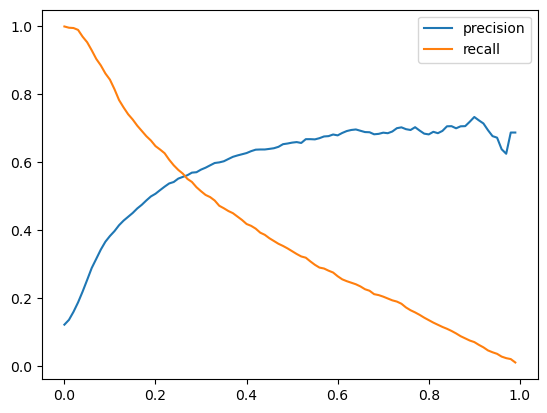

In [30]:
plt.plot(tab.threshold, tab['precision'], label='precision')
plt.plot(tab.threshold, tab['recall'], label='recall')
plt.legend()

#### question 4 - F1 score

In [31]:
tab['f1'] = 2*(tab['precision']*tab['recall'])/(tab['precision']+tab['recall'])

In [32]:
tab.iloc[tab['f1'].idxmax()]

threshold    0.220000
precision    0.528012
recall       0.626594
f1           0.573095
Name: 22, dtype: float64

#### question 5 - 5 fold cv

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [75]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [76]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

#### Question 6

In [77]:
!pip install tqdm

In [78]:
from tqdm.auto import tqdm

In [83]:
def train(df_train, y_train, C):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [84]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [87]:
n_splits = 5

for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.704 +- 0.009
C=0.001 0.998 +- 0.001
C=1 1.000 +- 0.000
